In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('For_EDA.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'source', 'date', 'time', 'category',
       'sub-category', 'content', 'url', 'label'],
      dtype='object')

In [43]:
df.head()

,Unnamed: 0,title,source,date,time,category,sub-category,content,url,label
0,0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",detik.com,10-Sep-19,23:40,detikNews,Berita,"Medan - Menantu Jokowi, Bobby Afif Nasution, m...",https://news.detik.com/berita/d-4701171/masuk-...,non-clickbait
1,1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,detik.com,10-Sep-19,21:32,detikNews,Berita,Jakarta - Malaysia kembali menyerang pemerinta...,https://news.detik.com/berita/d-4701078/malays...,non-clickbait
2,2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,detik.com,10-Sep-19,21:20,detikNews,Berita,Bekasi - Seorang driver ojek online di Bekasi ...,https://news.detik.com/berita/d-4701077/viral-...,clickbait
3,3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",detik.com,10-Sep-19,21:39,detikNews,Berita,Jakarta - Kementerian Sosial (Kemensos) menyal...,https://news.detik.com/berita/d-4701086/kemens...,non-clickbait
4,4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",detik.com,10-Sep-19,21:02,detikNews,Berita,Tangerang - Polisi menangkap pria berinisial J...,https://news.detik.com/berita/d-4701054/terkai...,clickbait


In [5]:
from spacy.lang.id import Indonesian
from nltk.tokenize import word_tokenize
lemmatizer = Indonesian()
def preprocessing(t,stops = set()):
    listKata = lemmatizer(t.lower().strip())
    cleanList = []
    for token in word_tokenize(str(listKata)):
        cleanList.append(str(token))
    t = ' '.join(cleanList)
    return t

In [9]:
import re
df['p_title']=df.title.apply(lambda x:re.sub(r'[^\w]',' ',x))
df['p_title']=df.title.apply(lambda x:re.sub(r'[0-9]',' ',x))

## Banyak Kata per Kalimat

In [10]:
from tqdm import tqdm
for i,j in tqdm(enumerate(df['title'])):
    df['p_title'][i]=preprocessing(df['title'][i])

15000it [00:19, 769.03it/s]


In [11]:
sent_length=[]
for i in df['p_title']:
    sent_length.append(len(word_tokenize(i)))
df['sent_length']=sent_length

Text(0.5, 1.0, 'Distribusi Banyak Kata per Kalimat')

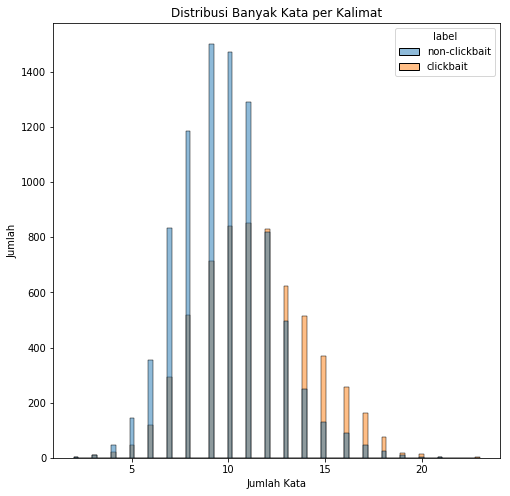

In [12]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x='sent_length',hue='label',)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah')
plt.title('Distribusi Banyak Kata per Kalimat')
plt.show()

## Struktur Kalimat

In [13]:
avg_word_length=[]
for i in df['p_title']:
    avg_word_length.append(np.average([len(j) for j in word_tokenize(i)]))
df['word_length']=avg_word_length

In [14]:
print('Average length of words of clickbait :',df[df['label']=='clickbait'].word_length.mean())
print('Average length of words of non-clickbait :',df[df['label']!='clickbait'].word_length.mean())

Average length of words of clickbait : 5.27034216213162
Average length of words of non-clickbait : 5.5279209002538865


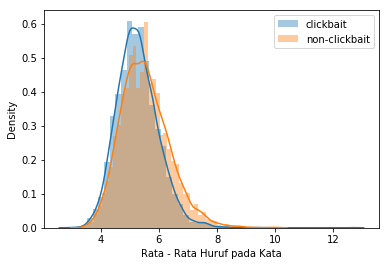

In [15]:
sns.distplot(df[df['label']=='clickbait']['word_length'],label='clickbait')
sns.distplot(df[df['label']!='clickbait']['word_length'],label='non-clickbait')
plt.xlabel('Rata - Rata Huruf pada Kata')
plt.legend()
plt.show()

In [16]:
from spacy.lang.id import Indonesian
#lemmatizer = spacy.lang.id.Indonesian
lemmatizer = Indonesian()
file = open('data/stopwords_id.txt')
text = file.read()
stops=set(text.split())

In [17]:
from nltk.tokenize import word_tokenize
def stopword_ratio(t,stops = set()):
    listKata = lemmatizer(t.lower().strip())
    num_stops=0
    for token in word_tokenize(str(listKata)):
        if token in stops:
            num_stops+=1
    ratio=num_stops/len(word_tokenize(str(listKata)))
    return ratio

In [18]:
stopwords_ratio=[]
for i in df['p_title']:
    stopwords_ratio.append(stopword_ratio(i,stops))
df['Stops_ratio']=stopwords_ratio

In [19]:
print('Average stopwords percentage of clickbait :',df[df['label']=='clickbait'].Stops_ratio.mean())
print('Average stopwords percentage of non-clickbait :',df[df['label']!='clickbait'].Stops_ratio.mean())

Average stopwords percentage of clickbait : 0.21337927302758242
Average stopwords percentage of non-clickbait : 0.1680981847447754


Text(0.5, 1.0, 'Rata - Rata Persentasi Stopword')

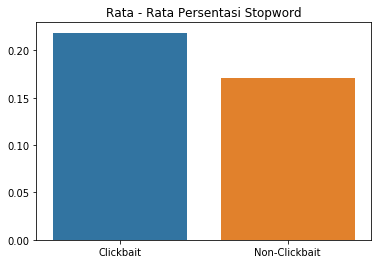

In [32]:
sns.barplot(x=['Clickbait','Non-Clickbait'],y=[0.2187194092987689,0.1713475361866192])
plt.title('Rata - Rata Persentasi Stopword')

## Simbol (Punctuation)

In [23]:
Unusual_punctuation=[]
for i in df['title']:
    punct=re.findall(r'[\W]',i.replace(' ',''))
    Unusual_punctuation.append(len(punct))

In [24]:
df['Num_Punctuation']=Unusual_punctuation

Text(0.5, 1.0, 'Jumlah Punktuasi (simbol - simbol)')

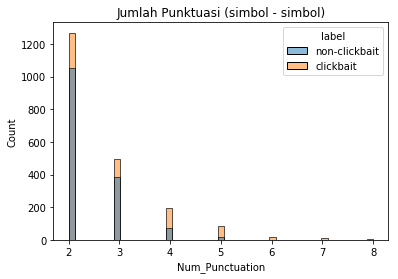

In [25]:
sns.histplot(data=df[(df['Num_Punctuation']<9)&(df['Num_Punctuation']>1)],x='Num_Punctuation',hue='label')
plt.title('Jumlah Punktuasi (simbol - simbol)')

Text(0.5, 1.0, 'Jumlah Punktuasi (simbol - simbol)')

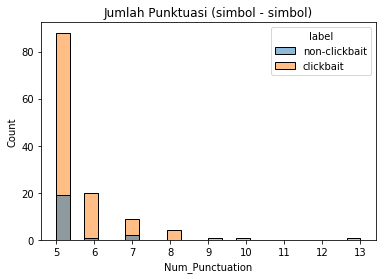

In [26]:
sns.histplot(data=df[(df['Num_Punctuation']>=5)],x='Num_Punctuation',hue='label')
plt.title('Jumlah Punktuasi (simbol - simbol)')

# Kategori dan Sumber

In [27]:
df['category']=df.category.apply(lambda x:x.title())

In [28]:
df.category.unique()

array(['Detiknews', 'Bisnis', 'Nasional', 'Sport', 'Metro', 'Cantik',
       'Dunia', 'Bola', 'Travel', 'Gaya', 'Tekno', 'Seleb', 'Otomotif',
       'Kolom', 'Event', 'Difabel', 'Creativelab', 'Fokus', 'Super Skor',
       'Regional', 'Pertamina', 'Techno', 'Internasional', 'Kesehatan',
       'Lifestyle', 'Metropolitan', 'Pendidikan', 'Tribunners', 'Dpd Ri',
       'Dpr Ri', 'Sains', 'Australia Plus', 'Kilas Kementerian',
       'Bea Cukai', 'Haji', 'Kalbe Health Corner', 'Selebriti', 'Film',
       'Tv', 'Serbaserbi', 'Musik', 'Health', 'Kuliner', 'Parenting',
       'News & Entertainment', 'Beauty', 'Korea', 'Film Internasional',
       'Film Indonesia', 'Sinetron', 'Hollywood', 'Televisi', 'News',
       'Entertainment', 'Money', 'Properti', 'Showbiz', 'Global',
       'Celebrity', 'Sports', 'Economy', 'Muslim', 'Berita Viral',
       'Teknologi', 'Berita Utama', 'Berita Sumut', 'Medan Bung',
       'Kriminal', 'Dahlan Iskan', 'Medan Update', 'Ekonomi', 'Hiburan',
       'Pariwisat

In [29]:
from collections import Counter
cc_clickbait=Counter(df[df.label=='clickbait'].category)

In [30]:
def cat_1(x):
    Selebriti=['Selebriti','Seleb','Celebrity','News & Entertainment','Hollywood','Entertainment','Showbiz','Hiburan','Leisure','Musik'
              ,'Film','Film Internasional','Film Indonesia','Korea', 'Sinetron','Tv','Televisi']
    Ekbis=['Ekbis','Bisnis','Economy','Ekonomi','Money','Properti']
    Olahraga=['Sport','Bola','Sports','Sepak Bola','Super Skor']
    Otomotif=['Otomotif','Oto Tek','Autotekno']
    Tekno=['Tekno','Techno','Creativelab']
    Lifestyle=['Cantik','Beauty','Pariwisata','Gaya','Kalbe Health Corner','Health','Humor Medan','Ragam','Sains','Kesehatan']
    Berita=['Regional','Pertamina','Kolom','Event','Difabel','Metropolitan','News','Medan Update','Daerah','Berita Viral','Berita Utama', 
            'Berita Sumut','Medan Bung','Retizen','Internasional','Dunia','International','Global','Australia Plus','Nasional','Detiknews','Dpd Ri','Dpr Ri','Dahlan Iskan','Mpr Ri','Kilas Kementerian','Fokus','Metro','Tribunners'
           ,'Kriminal','English']
    Religi =['Haji','Muslim','Ihram', 'Khazanah']
    Lain=['Acit Nai','Kisah Nyata','Serbaserbi','Sastra','Beacukai','Bea Cukai','Kuliner','Travel','Pendidikan','Parenting','Konsultasi']
    if x in Selebriti:
        x='Selebriti&Entertainment'
    elif x in Ekbis:
        x='Ekonomi&Bisnis'
    elif x in Olahraga:
        x='Olahraga'
    elif x in Otomotif:
        x='Otomotif'
    elif x in Tekno:
        x='Teknologi'
    elif x in Lifestyle:
        x='Lifestyle'
    elif x in Berita:
        x='Berita'
    elif x in Religi:
        x='Religi'
    elif x in Lain:
        x='Lain'
    return x
df.category=df.category.apply(lambda x:cat_1(x))

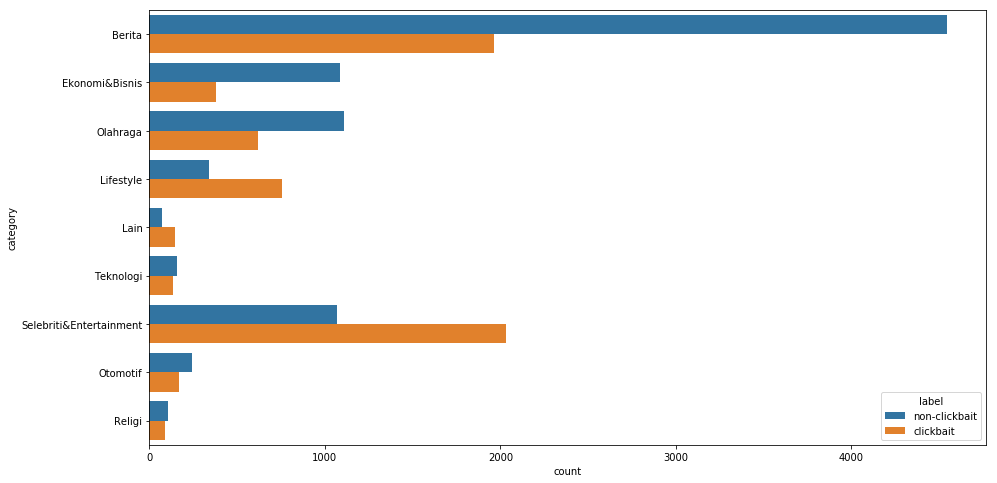

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(y=df.category, hue=df.label)
plt.show()

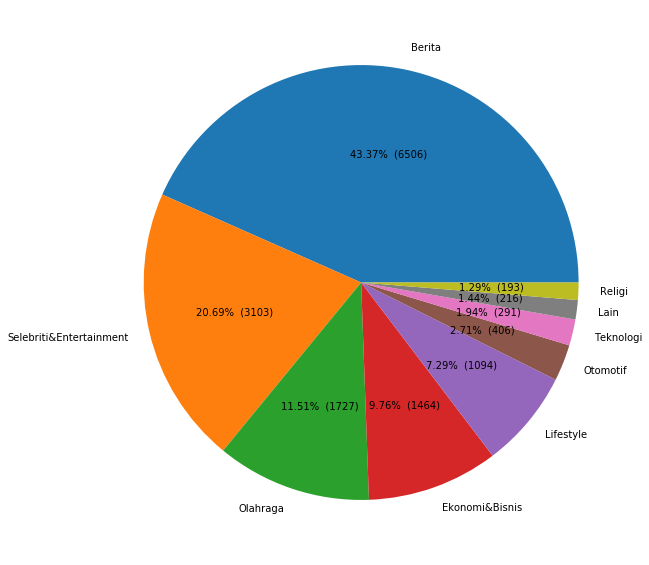

In [35]:
cc_all=Counter(df.category)
values=[i[1] for i in cc_all.most_common(10)]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.figure(figsize=(10,10))
plt.pie(values,labels=[i[0] for i in cc_all.most_common(10)], autopct=make_autopct(values))
plt.show()

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


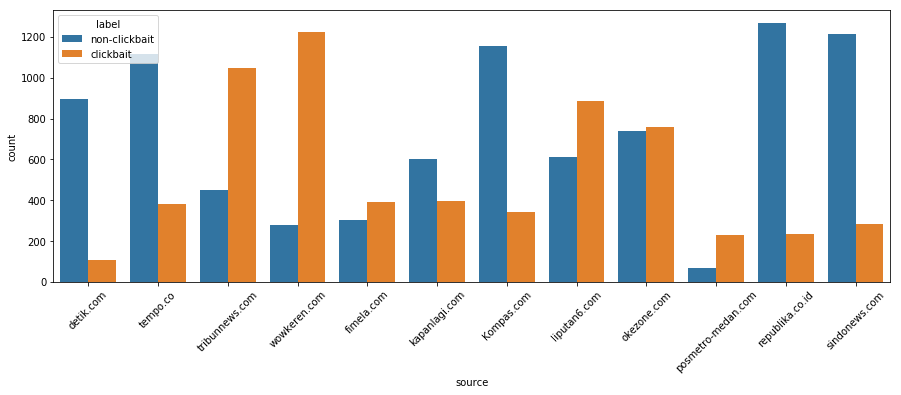

In [249]:
plt.figure(figsize=(15,5))
sns.countplot(df.source,hue=df.label)
plt.xticks(rotation=45)
plt.show()

# Date Time Inference

In [69]:
def hour_in_day(x):
    if len(re.findall(r'[\d]+\:[\d]{2}',str(x)))>0:
        x=[i for i in re.findall(r'[\d]+\:[\d]{2}',str(x))[0]]
        if len(x)==5:
            res_h=int(x[0]+x[1])
            res_m=int(x[-2]+x[-1])
        elif len(x)==4:
            res_h=int(x[0])
            res_m=int(x[-2]+x[-1])
        if res_m>30:
            res_h+=1
        if res_h==0:
            res_h=24
        return res_h
    else :
        return None

In [70]:
df['hour_in_day']=df.time.apply(lambda x : hour_in_day(x))

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


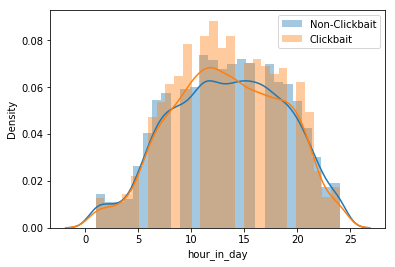

In [74]:
sns.distplot(df[df.label=='non-clickbait'].hour_in_day.dropna(),label='Non-Clickbait')
sns.distplot(df[df.label=='clickbait'].hour_in_day.dropna(),label='Clickbait')
plt.legend()
plt.show()

# Word Cloud

In [48]:
data.title.head(3)

0    masuk radar pilwalkot medan menantu jokowi ber...
1      malaysia sudutkan ri isu kabut asap invasi babi
2    viral driver ojol bekasi pesanan makanan pakai...
Name: title, dtype: object

Wordcloud All


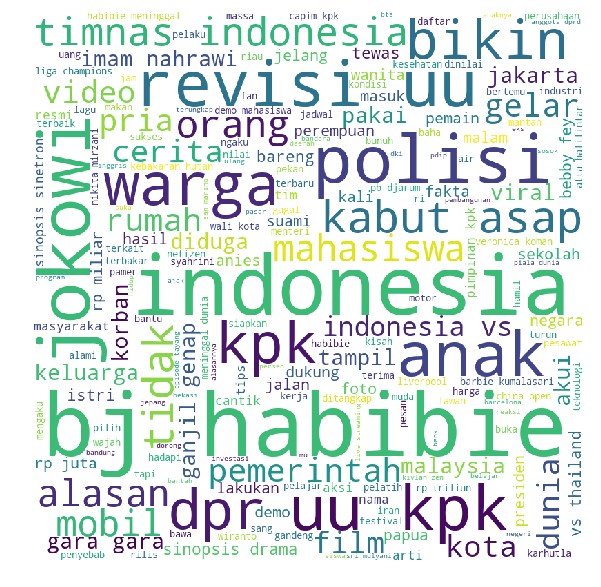

In [37]:
print('Wordcloud All')
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
for val in df.title:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Wordcloud Non-Clickbait


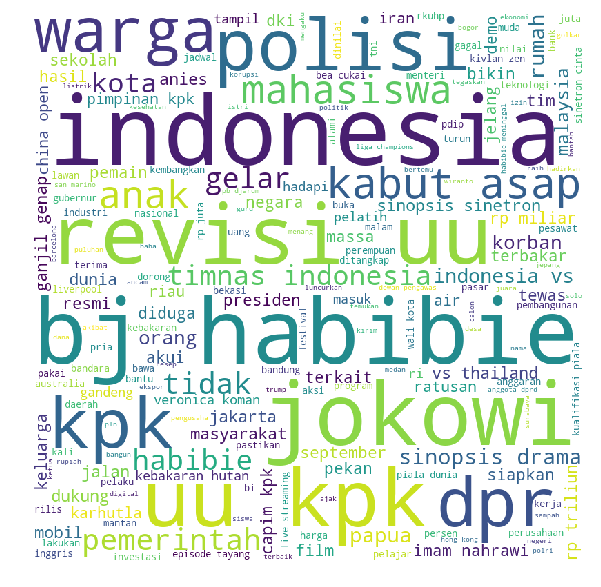

In [38]:
print('Wordcloud Non-Clickbait')
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
for val in df[df.label!='clickbait'].title:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Wordcloud Clickbait


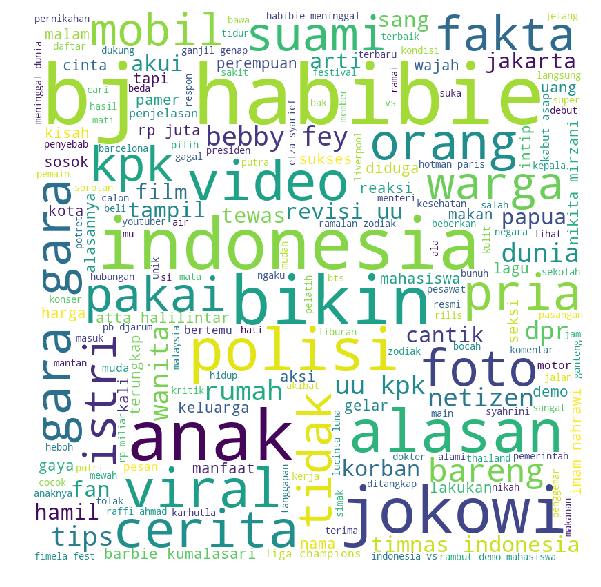

In [39]:
print('Wordcloud Clickbait')
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
for val in df[df.label=='clickbait'].title:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [46]:
w_count=Counter(comment_words.split())

In [50]:
w_count.most_common(10)

[('kpk', 812),
 ('indonesia', 758),
 ('habibie', 756),
 ('bj', 507),
 ('jokowi', 446),
 ('anak', 414),
 ('polisi', 405),
 ('dpr', 394),
 ('vs', 374),
 ('uu', 337)]

# Fitur yang Di Gunakan

In [31]:
fusion_df=df.drop(columns=['Unnamed: 0', 'title', 'source', 'date', 'time', 'category',
       'sub-category', 'content', 'url', ]).merge(pd.get_dummies(df[['category','source']]),left_index=True,right_index=True)

In [34]:
fusion_df.sample()

,label,p_title,sent_length,word_length,Stops_ratio,Num_Punctuation,category_Berita,category_Ekonomi&Bisnis,category_Lain,category_Lifestyle,...,source_fimela.com,source_kapanlagi.com,source_liputan6.com,source_okezone.com,source_posmetro-medan.com,source_republika.co.id,source_sindonews.com,source_tempo.co,source_tribunnews.com,source_wowkeren.com
11407,clickbait,saksikan seksinya grace iskandar si inem lumay...,11,5.0,0.090909,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
fusion_df.columns

Index(['label', 'p_title', 'sent_length', 'word_length', 'Stops_ratio',
       'Num_Punctuation', 'category_Berita', 'category_Ekonomi&Bisnis',
       'category_Lain', 'category_Lifestyle', 'category_Olahraga',
       'category_Otomotif', 'category_Religi',
       'category_Selebriti&Entertainment', 'category_Teknologi',
       'source_Kompas.com', 'source_detik.com', 'source_fimela.com',
       'source_kapanlagi.com', 'source_liputan6.com', 'source_okezone.com',
       'source_posmetro-medan.com', 'source_republika.co.id',
       'source_sindonews.com', 'source_tempo.co', 'source_tribunnews.com',
       'source_wowkeren.com'],
      dtype='object')